# Assignement 3: CNN Exercise

## Load libraries

In [1]:
import pickle
import numpy as np
import pandas as pd

from keras.datasets import mnist
from keras.utils import to_categorical
from keras import layers
from keras import models

import matplotlib.pyplot as plt
from numpy.random import seed
from keras.utils import plot_model

import csv
import json

from keras.callbacks import EarlyStopping



C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Load the dataset

In [2]:
#Load the dataset
try:
    #Load the MNIST data
    (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
    
    #Reshape and trasform the input
    train_images = train_images.reshape((60000, 28, 28, 1))
    train_images = train_images.astype('float32') / 255
    test_images = test_images.reshape((10000, 28, 28, 1))
    test_images = test_images.astype('float32') / 255

    train_labels = to_categorical(train_labels)
    test_labels = to_categorical(test_labels)
    
    print("Data Loaded")
    
except:
    print("Error Loading Data")


Data Loaded


## Create the network, train and evaluate

In [16]:
seed(42)

model = models.Sequential()

#Create the network
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

#Create early stop callback
earlystop = EarlyStopping(monitor='loss', min_delta=0.0001, patience=5, \
                          verbose=1, mode='auto')
callbacks_list = [earlystop]

#Compile the model
model.compile(
        optimizer='rmsprop',
        loss='categorical_crossentropy',
        metrics=['accuracy'])

#Fit the model to the data
history = model.fit(
            train_images, 
            train_labels, 
            epochs=10, 
            callbacks=callbacks_list,
            batch_size=254,
            validation_data=(test_images,test_labels))

print("\nTraining completed")

#Evaluate the test set
history_evaluation = model.evaluate(test_images, test_labels)

print("\nEvaluation completed")


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 19s 322us/step - loss: 0.6149 - acc: 0.8169 - val_loss: 0.3241 - val_acc: 0.8938
Epoch 2/10
60000/60000 [==============================] - 22s 361us/step - loss: 0.2056 - acc: 0.9380 - val_loss: 0.1750 - val_acc: 0.9438
Epoch 3/10
60000/60000 [==============================] - 19s 314us/step - loss: 0.1427 - acc: 0.9563 - val_loss: 0.1713 - val_acc: 0.9451
Epoch 4/10
60000/60000 [==============================] - 18s 296us/step - loss: 0.1115 - acc: 0.9659 - val_loss: 0.1271 - val_acc: 0.9624
Epoch 5/10
60000/60000 [==============================] - 18s 292us/step - loss: 0.0933 - acc: 0.9715 - val_loss: 0.1065 - val_acc: 0.9670
Epoch 6/10
60000/60000 [==============================] - 18s 292us/step - loss: 0.0807 - acc: 0.9753 - val_loss: 0.1044 - val_acc: 0.9650
Epoch 7/10
60000/60000 [==============================] - 18s 293us/step - loss: 0.0723 - acc: 0.9777 - val_loss: 0.

## Visualize results

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 16)        2320      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 16)                6416      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                170       
Total para

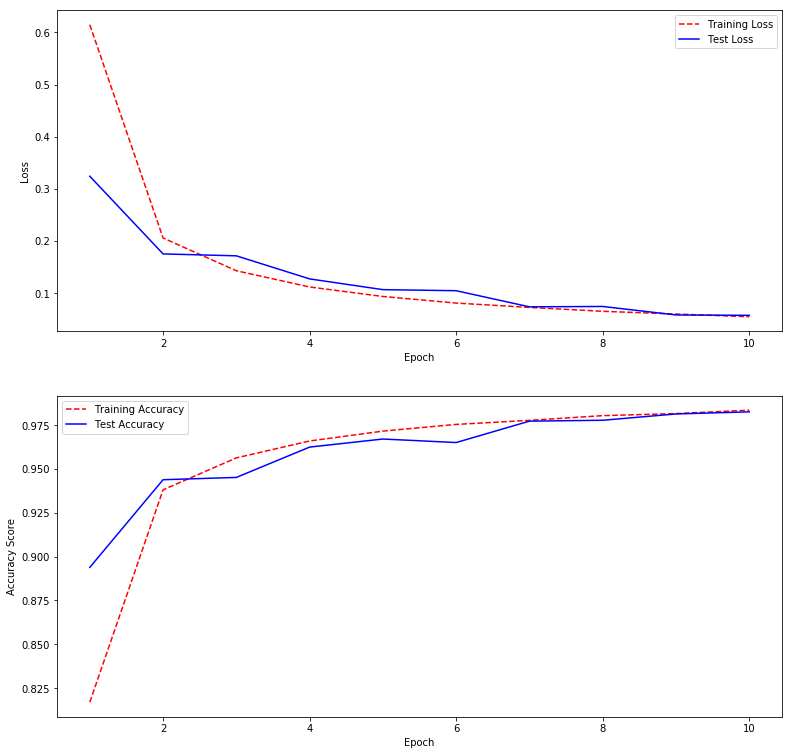

In [20]:
model.summary()

# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']
# Get training and test accuracy histories
training_accuracy = history.history['acc']
test_accuracy = history.history['val_acc']

#print(history_evaluation)

print("Training Accuracy " + str(training_accuracy[-1]))
print("Training Loss: " + str(training_loss[-1]))
print("Test Accuracy: " + str(test_accuracy[-1]))
print("Test Loss: " + str(test_loss[-1]))

print("Model Parameters: " + str(model.count_params()))

# Plot the accuracy and cost summaries 
f, (ax1, ax2) = plt.subplots(2, 1, sharex=False, figsize=(13,13))

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
ax1.plot(epoch_count, training_loss, 'r--')
ax1.plot(epoch_count, test_loss, 'b-')
ax1.legend(['Training Loss', 'Test Loss'])
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')

# Create count of the number of epochs
epoch_count = range(1, len(training_accuracy) + 1)

# Visualize accuracy history
ax2.plot(epoch_count, training_accuracy, 'r--')
ax2.plot(epoch_count, test_accuracy, 'b-')
ax2.legend(['Training Accuracy', 'Test Accuracy'])
ax2.set_ylabel('Accuracy Score')
ax1.set_xlabel('Epoch')

plt.xlabel('Epoch')
plt.show();
